The names of the students :
/ Abeer Abdullah Hindi Al-Juhani   3209798
/ Batoul Khaled Al-Hajjaji   3750114 
/ Doaa Khader Al-Ahmadi   3952004


In [31]:
pip install Graphviz

Note: you may need to restart the kernel to use updated packages.


In [64]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import graphviz
import os
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
sns.set(color_codes = True)
%matplotlib inline 
seed = 10

In [65]:
dd = pd.read_csv('C:/Users/Duaa_/Downloads/data_banknote_authentication.txt', delimiter="," ,
                  names =['Variance of Wavelet Transformed image',
                                'Skewness of Wavelet Transformed image',
                                'Curtosis of Wavelet Transformed image',
                                'Entropy of image','Status'])
dd.head(None)

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Status
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


We used the code to upload our data to the project file for testing.

In [66]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Variance of Wavelet Transformed image  1372 non-null   float64
 1   Skewness of Wavelet Transformed image  1372 non-null   float64
 2   Curtosis of Wavelet Transformed image  1372 non-null   float64
 3   Entropy of image                       1372 non-null   float64
 4   Status                                 1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In Figure 2 shows us that Info(): It returns the names of the columns, the number of records in the data frame, the size of the frame in the memory, in addition to the type of data in each frame and all data in the dataset are numeric and the data type are int64 and float64 appears.

In [67]:
dd.isnull().any()

Variance of Wavelet Transformed image    False
Skewness of Wavelet Transformed image    False
Curtosis of Wavelet Transformed image    False
Entropy of image                         False
Status                                   False
dtype: bool

In figure 3 Show us if there is any missing data if it appears False. This means that there are no missing data in this column. However, if the word True appears, it means that there are missing data and it must be dealt with before starting work.

In [68]:
dd.isnull().sum()

Variance of Wavelet Transformed image    0
Skewness of Wavelet Transformed image    0
Curtosis of Wavelet Transformed image    0
Entropy of image                         0
Status                                   0
dtype: int64

In [69]:
dd.describe()

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Status
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


Provide us with a lot of statistical information such as: average calculation, median ,number of records in each frame, standard deviation and so on.

In [70]:
dd.corr()

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Status
Variance of Wavelet Transformed image,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness of Wavelet Transformed image,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Curtosis of Wavelet Transformed image,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy of image,0.276817,-0.526321,0.318841,1.000000,-0.023424
Status,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In figure 4 we used to find the pairwise correlation of all columns in the data frame with numeric data only. correlation of a variable with itself is1, and we notice that "Entropy of image" and "Curtosis of Wavelet Transformed image" have correlation

In [71]:
print(dd.shape)

(1372, 5)


In figure 6 shows the structure of the dataset have 5 columns, 1372 rows.

0    762
1    610
Name: Status, dtype: int64


<AxesSubplot:>

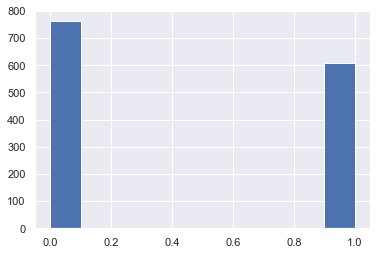

In [72]:
print(dd["Status"].value_counts())
dd["Status"].hist()

In figure 7 shows that the Status column has two values, the first value of 0, which means that forged money equals 762 rows, and that value 1 means that the money is genuine equal to 610 rows.

C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


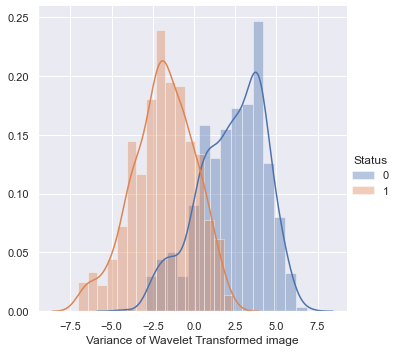

C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


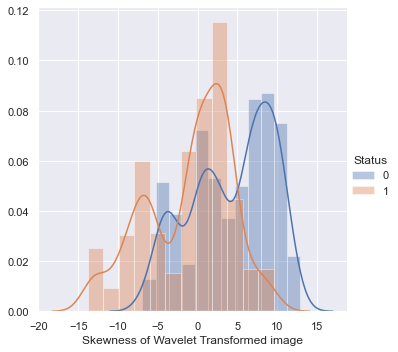

C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


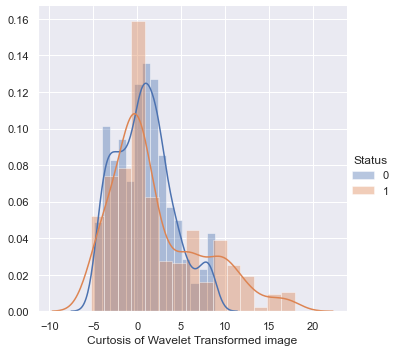

C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Duaa_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


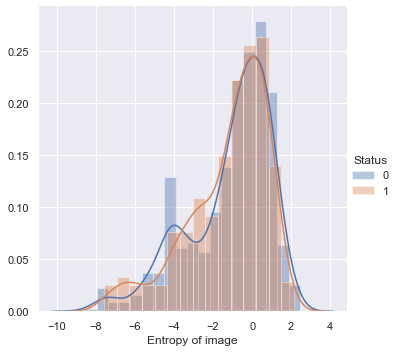

In [73]:
for ojha, feature in enumerate(list(dd.columns)[:-1]):
    fg = sns.FacetGrid(dd, hue='Status', height=5)
    fg.map(sns.distplot, feature ).add_legend()
    plt.show()

In the previous figure, the column Variance of Wavelet Transformed
image was compared with column Status with all value, which shows us
the frequency distribution for each of the value 0, which means (Forged)
and the other value is 1, which means (genuine). We note the highest
iterations of the value 0 were between two periods of 2.5 To 5 We also find
that the highest frequency of occurrences of the value 1 was between two
periods which are from -2.5 to 0 and that the interactions between them are
also between two periods which are from -2.5 to 2.5 approximately, which
means that the greater the interactions between them, the similarity ratio is
a value Mean close to each other


In the previous figure, the column Entropy of image was compared with
column Status with all value, which shows us the frequency distribution
for each of the value 0, which means (Forged) and the other value is 1,
which means (genuine). We note the highest iterations of the value 0 were
between two periods of 0 To 1 We also find that the highest frequency of
occurrences of the value 1 was between two periods which are from 0 to 1
and that the interactions between them are also between two periods which
are from -8 to 2 approximately, which means that the greater the
interactions between them, the similarity ratio is a value Mean is very
similar because the values are very close to each other.

In [74]:
aa=dd[(~dd["Status"].isin(dd)) & (dd["Status"] ==0)]
print(aa.mean())
bb=dd[(~dd["Status"].isin(dd)) & (dd["Status"] ==1)]
print(bb.mean())

Variance of Wavelet Transformed image    2.276686
Skewness of Wavelet Transformed image    4.256627
Curtosis of Wavelet Transformed image    0.796718
Entropy of image                        -1.147640
Status                                   0.000000
dtype: float64
Variance of Wavelet Transformed image   -1.868443
Skewness of Wavelet Transformed image   -0.993576
Curtosis of Wavelet Transformed image    2.148271
Entropy of image                        -1.246641
Status                                   1.000000
dtype: float64


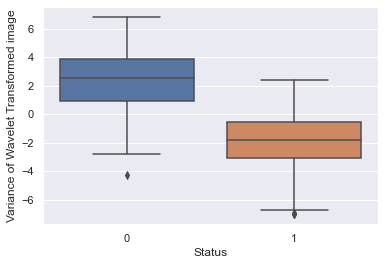

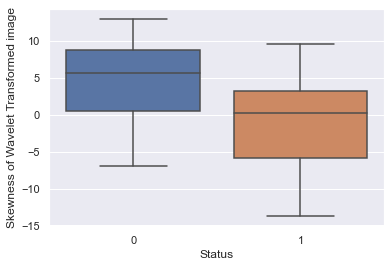

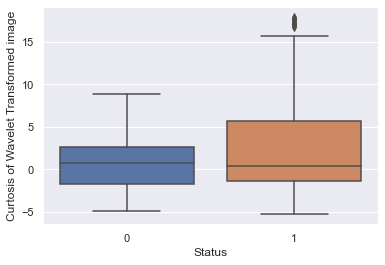

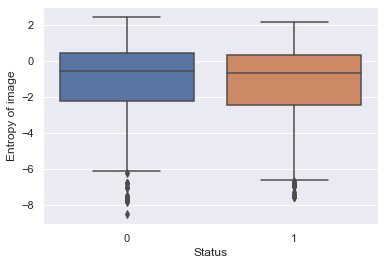

In [75]:
sns.boxplot(x='Status',y='Variance of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Skewness of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Curtosis of Wavelet Transformed image', data=dd)
plt.show()
sns.boxplot(x='Status',y='Entropy of image', data=dd)
plt.show()

In figure 8 shows a square containing three data: the first quartile is equal
to -1.773, the Median is the line in the middle of the big square is equal to
0.49618, the third quartile is equal to 2.821475, and the points are outliers
in "Variance of Wavelet Transformed image" column for each "Status".



In figure 9 shows a square containing three data: the first quartile is equal
to -1.7082, the Median is the line in the middle of the big square is equal
to 2.31965, the third quartile is equal to 6.814625, doesn't have outliers in
" Skewness of Wavelet Transformed image" column.



In figure 10 shows a square containing three data: the first quartile is equal
to -1.574975, the Median is the line in the middle of the big square is equal
to 0.61663, the third quartile is equal to 3.17925, and the points are outliers
in " Curtosis of Wavelet Transformed image" column for "Status" 1 only.



In figure 11 shows a square containing three data: the first quartile is equal
to -2.41345, the Median is the line in the middle of the big square is equal 10
to -0.58665, the third quartile is equal to 0.39481 , and the points are
outliers in " Entropy of image" column for each "Status".


<AxesSubplot:xlabel='Variance of Wavelet Transformed image', ylabel='Skewness of Wavelet Transformed image'>

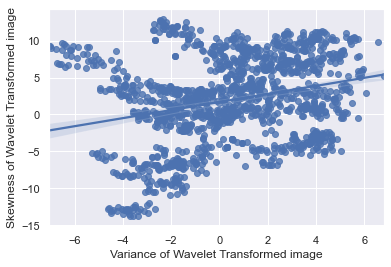

In [76]:
sns.regplot(x=dd['Variance of Wavelet Transformed image'], y=dd['Skewness of Wavelet Transformed image'])

<AxesSubplot:xlabel='Variance of Wavelet Transformed image', ylabel='Curtosis of Wavelet Transformed image'>

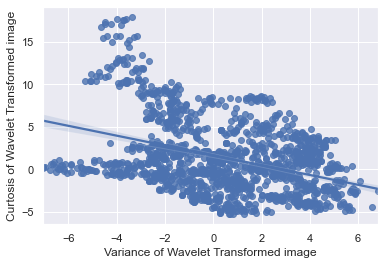

In [77]:
sns.regplot(x=dd['Variance of Wavelet Transformed image'], y=dd['Curtosis of Wavelet Transformed image'])

In figure 12 shows the relationship between column Variance of Wavelet
Transformed image and column Curtosis of Wavelet Transformed image
that appeared through the diagram "Scatter plots and Regression Line" and
the relationship was (weak negative) and the correlation value is equal to -0.380850.

<AxesSubplot:xlabel='Variance of Wavelet Transformed image', ylabel='Entropy of image'>

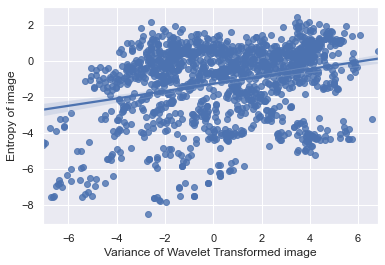

In [78]:
sns.regplot(x=dd['Variance of Wavelet Transformed image'], y=dd['Entropy of image'])

<AxesSubplot:xlabel='Curtosis of Wavelet Transformed image', ylabel='Entropy of image'>

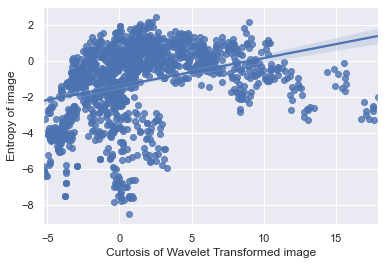

In [79]:
sns.regplot(x=dd['Curtosis of Wavelet Transformed image'], y=dd['Entropy of image'])

<AxesSubplot:xlabel='Skewness of Wavelet Transformed image', ylabel='Entropy of image'>

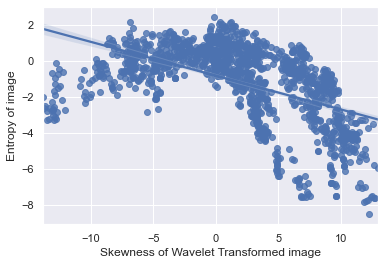

In [80]:
sns.regplot(x=dd['Skewness of Wavelet Transformed image'], y=dd['Entropy of image'])

In figure 13 shows the relationship between column Curtosis of Wavelet
Transformed image and column Entropy of image that appeared through
the diagram "Scatter plots and Regression Line" and the relationship was
(Weak Positive) and the correlation value is equal to 0.318841.

<AxesSubplot:xlabel='Skewness of Wavelet Transformed image', ylabel='Curtosis of Wavelet Transformed image'>

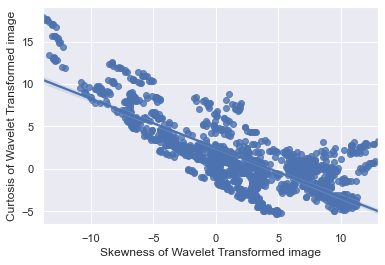

In [81]:
sns.regplot(x=dd['Skewness of Wavelet Transformed image'], y=dd['Curtosis of Wavelet Transformed image'])

In figure 13 shows the relationship between column Skewness of Wavelet
Transformed image and column Curtosis of Wavelet Transformed image
that appeared through the diagram "Scatter plots and Regression Line" and
the relationship was (Strong negative) and the correlation value is equal to
-0.786895.

In [82]:
le = LabelEncoder()
le.fit(dd['Status'].values)
y = le.transform(dd['Status'].values)
X = dd.drop('Status', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=seed)

Text(0, 0.5, 'accuracy')

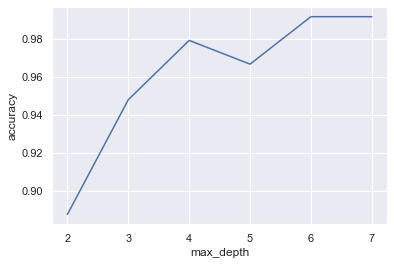

In [83]:
max_depth_range = list(range(2, 8))
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth= depth,
                              random_state=seed)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score) 
plt.plot(max_depth_range,accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')

In [84]:
tree = DecisionTreeClassifier(criterion='entropy',
                              min_samples_split=7,
                              max_depth=6,
                              random_state=seed)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('DecisionTreeClassifier accuracy score: {}'.format(accuracy))

DecisionTreeClassifier accuracy score: 0.9916839916839917


Confusion Matrix is
[[266   1]
 [  3 211]]


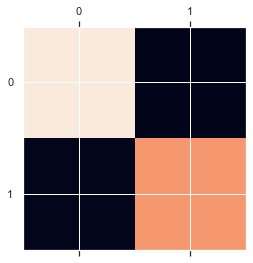

In [85]:
print('Confusion Matrix is')
print(confusion_matrix(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
plt.matshow(cm)
plt.show()

In [86]:
print(classification_report(y_test, y_pred, labels=dd['Status'].unique()))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       1.00      0.99      0.99       214

    accuracy                           0.99       481
   macro avg       0.99      0.99      0.99       481
weighted avg       0.99      0.99      0.99       481



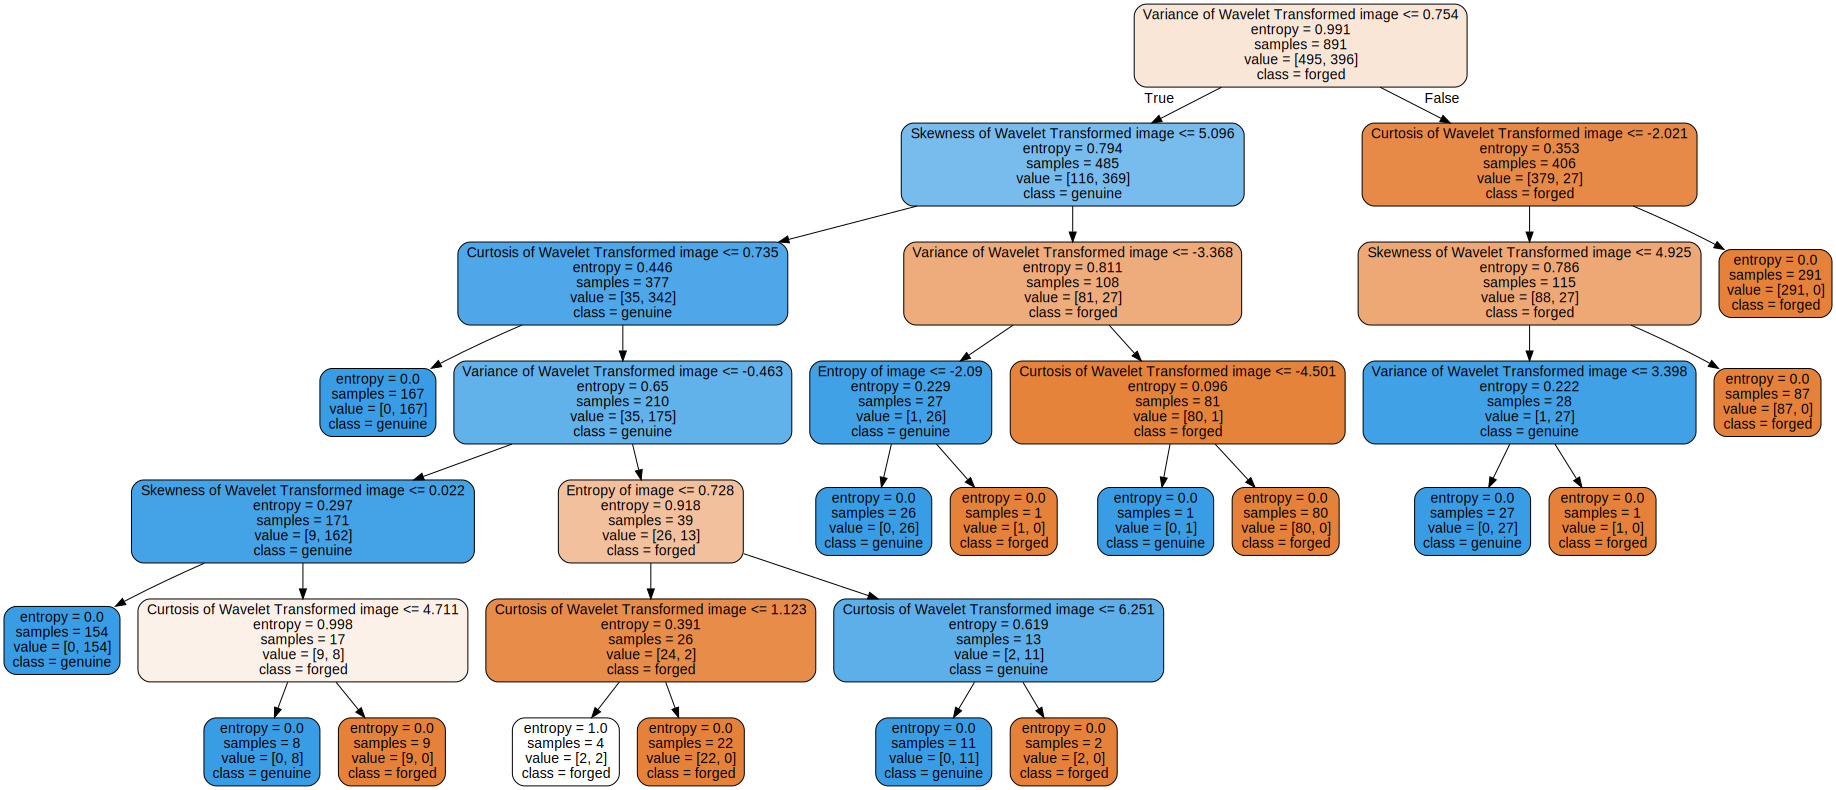

In [94]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'
def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['forged','genuine']
    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)
    graph = graphviz.Source(graph_data)
    graph.render(plot_title, view = True)
    return graph
tree_graph = plot_tree(tree, dd, 'Status', le, 'Tree DataSet Bank')
tree_graph

In figure 24, tree illustration shows us how the system has classified the
banknotes, are they fake or not?, We notice in Figure 24 that the root took
a column (Variance of Wavelet Transformed image) And gave it the
condition that the data be less or equal to 0.754 and if the condition
matches the condition goes to true and if it does not go to false then the
system applies another condition to a different column even the value
(entropy) reaches zero. the blue box is mean genuine and orange box is
mean forged.